# NYPD Motor Vehicle Collisions Prediction

Loading Data 
------

In [2]:
import numpy as np
import pandas as pd
data_path='/Users/apple/Desktop/Projects/dataset_NYPD/'


In [18]:
#load NYPD data
year=['2014','2015','2016']
month=['01','02','03','04','05','06','07','08','09','10','11','12']
area_name=['bk','bx','mn','qn','si']
#intersection
data_collisions = pd.read_excel(''.join([data_path,'NYPD/',year[2],'_',month[8],'_col_excel/',area_name[0],'acc-en-us.xlsx']),
                     sheetname='IntersectCollisions_1', header=3, skiprows=3)
data_collisions = pd.DataFrame(data_collisions)

data_VandF = pd.DataFrame(dataVandF)

In [3]:
#load NYC open data
data_collisions = pd.read_csv(''.join([data_path,'NYPD_Motor_Vehicle_Collisions.csv']))
data_collisions = pd.DataFrame(data_collisions)


In [4]:
data_collisions_main=data_collisions[['DATE','TIME','ZIP CODE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']]

Basic Analysis of the Distribution of Collisions 
------

In [5]:
data_collisions.shape

(916484, 29)

In [6]:
# Is it enough if when drop all instances with missing zip code?
print('Total collisions: ',len(data_collisions_main['ZIP CODE']))
print('ZIP CODE is missing: ',sum(pd.isnull(data_collisions_main['ZIP CODE'])))
print('Both ZIP CODE and LOCATION are missing: ',sum(pd.isnull(data_collisions['ZIP CODE'])&pd.isnull(data_collisions['LOCATION'])))

Total collisions:  916484
ZIP CODE is missing:  233326
Both ZIP CODE and LOCATION are missing:  157749


Manipulate with Missing Data
------

Should we do any analysis in the missing data?

In [7]:
position_nan = data_collisions_main['ZIP CODE'].notnull()
collisions=data_collisions_main[position_nan]
collisions.index=range(0,len(collisions))

In [8]:
collisions.rename(columns={'ZIP CODE': 'ZIPCode'}, inplace=True)
collisions.ZIPCode=collisions.ZIPCode.astype(int)
collisions[0:10]

/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,DATE,TIME,ZIPCode,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,09/18/2016,19:09,11422,0,0
1,09/18/2016,19:09,11237,2,0
2,09/18/2016,1:09,10012,0,0
3,09/18/2016,20:09,11229,0,0
4,09/18/2016,20:09,10003,0,0
5,08/12/2016,1:08,11377,2,0
6,08/12/2016,20:08,10460,0,0
7,08/12/2016,20:08,10466,0,0
8,08/12/2016,20:08,11216,0,0
9,08/12/2016,20:08,11226,0,0


In [9]:
import datetime
DATEandTIME=[]
for i in range(0,len(collisions)):
    DATEandTIME.append(datetime.datetime.strptime(''.join([collisions['DATE'][i],collisions['TIME'][i]]), "%m/%d/%Y%H:%M"))


In [10]:
collisions['DATEandTIME']=DATEandTIME

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
collisions=collisions.drop(['DATE','TIME'],1)

In [12]:
#Relocate for 100000
collisions['ZIPCode']=collisions['ZIPCode'].replace({10000: 10065})

collisions=collisions.sort_values(by=['ZIPCode','DATEandTIME'])

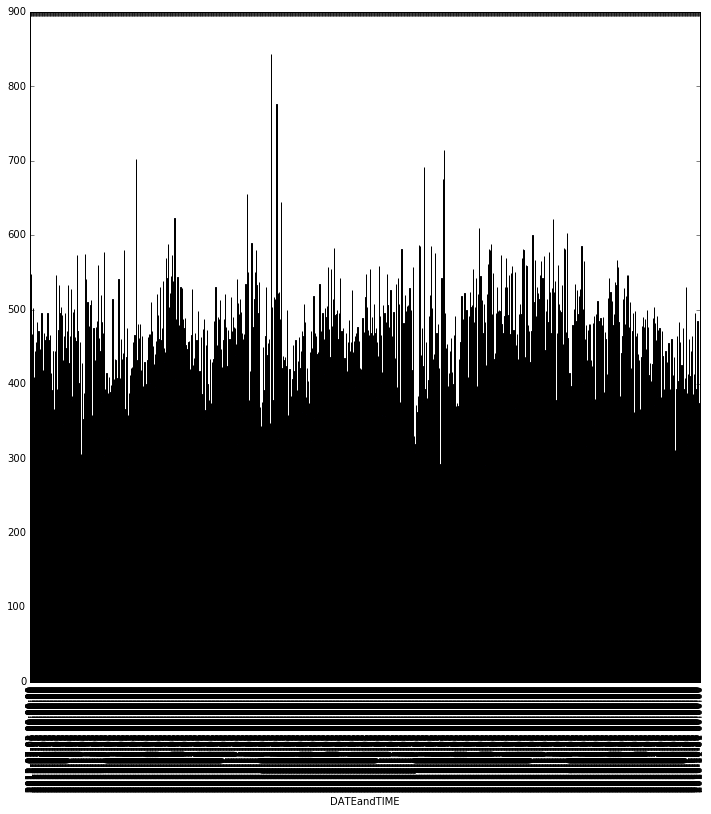

In [19]:
import matplotlib
import matplotlib.pyplot as plt
df=collisions
df.set_index('DATEandTIME', drop=False, inplace=True)
%matplotlib inline
fig = plt.figure(figsize = (12, 12))
df['ZIPCode'].groupby(pd.TimeGrouper(freq='D')).count().plot(kind='bar')

Building DATA Structure
------

1 Read in ZIP CODE list of NYC 

In [20]:
ZIP_Code_NYC=pd.read_csv(''.join([data_path,'zipcode.csv']))
ZIP_Code_NYC=pd.DataFrame(ZIP_Code_NYC)
ZIP_Code_NYC=ZIP_Code_NYC.drop_duplicates()
len(ZIP_Code_NYC)
ZIP_Code_NYC.index=range(0,240)

In [69]:
ZIP_Code_NYC

,zipcode,area
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan
5,10006,Manhattan
6,10007,Manhattan
7,10009,Manhattan
8,10010,Manhattan
9,10011,Manhattan


2 Build the TIME LINE of instances

In [22]:
# data start 7/1/12
# data end 11/1/16
DATEandTIME = pd.date_range('7/1/2012','11/2/2016', freq='H')[:-1]

In [23]:
DATEandTIME

DatetimeIndex(['2012-07-01 00:00:00', '2012-07-01 01:00:00',
               '2012-07-01 02:00:00', '2012-07-01 03:00:00',
               '2012-07-01 04:00:00', '2012-07-01 05:00:00',
               '2012-07-01 06:00:00', '2012-07-01 07:00:00',
               '2012-07-01 08:00:00', '2012-07-01 09:00:00',
               ...
               '2016-11-01 14:00:00', '2016-11-01 15:00:00',
               '2016-11-01 16:00:00', '2016-11-01 17:00:00',
               '2016-11-01 18:00:00', '2016-11-01 19:00:00',
               '2016-11-01 20:00:00', '2016-11-01 21:00:00',
               '2016-11-01 22:00:00', '2016-11-01 23:00:00'],
              dtype='datetime64[ns]', length=38040, freq='H')

3 Set a multi Index of ZIP code and DATE for data frame

In [24]:
ZIP = np.repeat(ZIP_Code_NYC['zipcode'],len(DATEandTIME))
DATE = np.tile(DATEandTIME, len(ZIP_Code_NYC))
arrays = [ZIP,DATE]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['ZIPCode', 'DATEandTIME'])

Feature Related to Time  (Hour, Week Holiday)
------

In [25]:
Hour = np.tile(range(0,24),1585*len(ZIP_Code_NYC))

In [26]:
data = pd.DataFrame(Hour, index=index,columns=['Hour'])

In [27]:
Week=[]
for i in range(0,len(DATE)):
    Week.append(pd.to_datetime(DATE[i]).weekday())
data['Week']=Week

In [28]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2012-07-01', end='2016-11-1')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
Holidays= dr.isin(holidays)
Holidays = np.repeat(Holidays, 24)
Holidays = np.tile(Holidays, len(ZIP_Code_NYC))
data['Holidays'] = Holidays

ALL instances: $9129600$

Positive instances: $<=683158$

683158 / 9129600 = 0.0748 


Target Variable 
------

In [31]:
collisions[0:10]

,ZIPCode,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,DATEandTIME
DATEandTIME,,,,
2012-07-01 04:44:00,10001,1,0,2012-07-01 04:44:00
2012-07-01 15:40:00,10001,0,0,2012-07-01 15:40:00
2012-07-01 16:40:00,10001,0,0,2012-07-01 16:40:00
2012-07-01 23:10:00,10001,3,0,2012-07-01 23:10:00
2012-07-02 09:15:00,10001,0,0,2012-07-02 09:15:00
2012-07-02 11:30:00,10001,0,0,2012-07-02 11:30:00
2012-07-02 17:30:00,10001,0,0,2012-07-02 17:30:00
2012-07-02 17:50:00,10001,0,0,2012-07-02 17:50:00
2012-07-02 19:14:00,10001,0,0,2012-07-02 19:14:00


In [37]:
Grouped = collisions.groupby(['ZIPCode',pd.TimeGrouper(freq='H')])
Grouped_collision = Grouped[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']].sum()
Grouped_collision['Count']= Grouped[['NUMBER OF PERSONS INJURED']].count()

In [68]:
weight=[0.1,0.3,1]
Weighted_severity = weight[0]*Grouped_collision['NUMBER OF PERSONS INJURED']+weight[1]*Grouped_collision['NUMBER OF PERSONS KILLED']+Grouped_collision['Count']
Grouped_collision['severity'] = Weighted_severity
Weighted_severity.describe()
print('>=3',sum(Weighted_severity>=3))
print('>=2',sum((Weighted_severity>=2) & (Weighted_severity<3)))
print('>=1',sum((Weighted_severity>=1) & (Weighted_severity<2)))
print('=1',sum(Weighted_severity==1))
print('>1',sum(Weighted_severity>1))
#Weighted_severity>=1 
#Weighted_severity<2

>=3 5103
>=2 51721
>=1 563985
=1 456837
>1 163972


(array([  4.56837000e+05,   0.00000000e+00,   0.00000000e+00,
          8.43920000e+04,   0.00000000e+00,   0.00000000e+00,
          1.42530000e+04,   0.00000000e+00,   0.00000000e+00,
          5.31400000e+03,   0.00000000e+00,   0.00000000e+00,
          1.84100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.76000000e+02,   0.00000000e+00,
          0.00000000e+00,   3.28000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.52000000e+02,   0.00000000e+00,
          0.00000000e+00,   5.90000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.30000000e+01,
          0.00000000e+00,   0.00000000e+00,   3.50700000e+04,
          0.00000000e+00,   0.00000000e+00,   1.15620000e+04,
          0.00000000e+00,   0.00000000e+00,   3.26400000e+03,
          0.00000000e+00,   0.00000000e+00,   1.01800000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.59000000e+02,   0.00000000e+00,   0.00000000e+00,
        

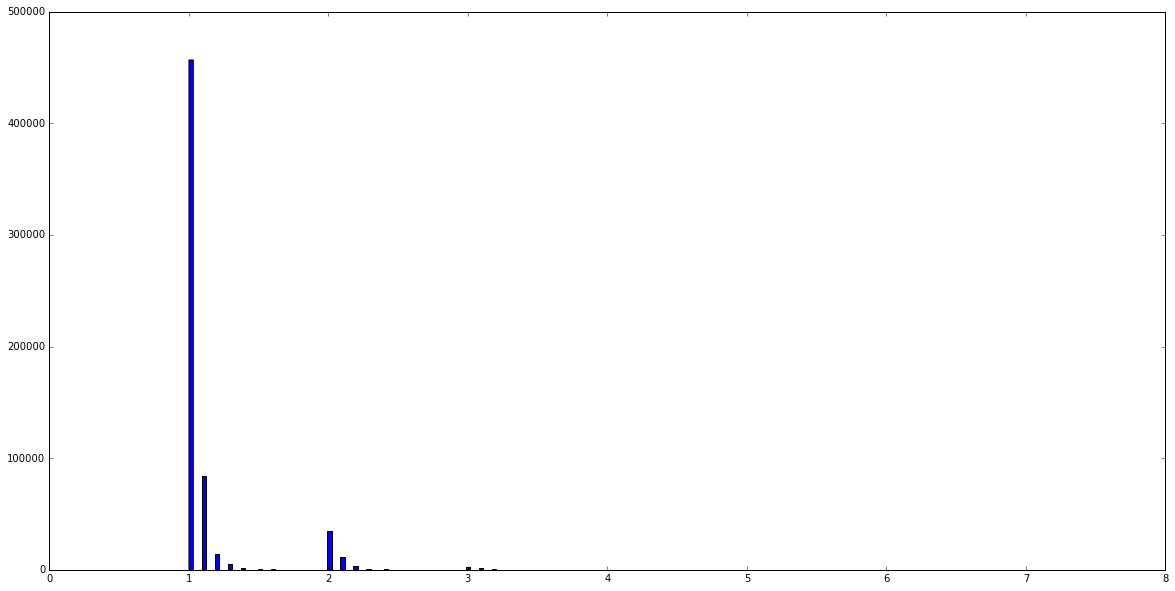

In [57]:
fig = plt.figure(figsize = (20, 10))
plt.hist(Weighted_severity,bins=200)

In [75]:
len(Grouped_collision)

620809

In [70]:
data = pd.concat([data, Grouped_collision], axis=1)
data=data.replace({None: 0})

In [78]:
data[0:100]

Hour  Week Holidays  NUMBER OF PERSONS INJURED  \
ZIPCode DATEandTIME                                                           
10001   2012-07-01 00:00:00   0.0   6.0    False                        0.0   
        2012-07-01 01:00:00   1.0   6.0    False                        0.0   
        2012-07-01 02:00:00   2.0   6.0    False                        0.0   
        2012-07-01 03:00:00   3.0   6.0    False                        0.0   
        2012-07-01 04:00:00   4.0   6.0    False                        1.0   
        2012-07-01 05:00:00   5.0   6.0    False                        0.0   
        2012-07-01 06:00:00   6.0   6.0    False                        0.0   
        2012-07-01 07:00:00   7.0   6.0    False                        0.0   
        2012-07-01 08:00:00   8.0   6.0    False                        0.0   
        2012-07-01 09:00:00   9.0   6.0    False                        0.0   
        2012-07-01 10:00:00  10.0   6.0    False                        0.0   
        2012-07-01 11:00:00  11.0   6.0    False                        0.0   
        2012-07-01 12:00:00  12.0   6.0    False                        0.0   
        2012-07-01 13:00:00  13.0   6.0    False                        0.0   
        2012-07-01 14:00:00  14.0   6.0    False                        0.0   
        2012-07-01 15:00:00  15.0   6.0    False                        0.0   
        2012-07-01 16:00:00  16.0   6.0    False                        0.0   
        2012-07-01 17:00:00  17.0   6.0    False                        0.0   
        2012-07-01 18:00:00  18.0   6.0    False                        0.0   
        2012-07-01 19:00:00  19.0   6.0    False                        0.0   
        2012-07-01 20:00:00  20.0   6.0    False                        0.0   
        2012-07-01 21:00:00  21.0   6.0    False                        0.0   
        2012-07-01 22:00:00  22.0   6.0    False                        0.0   
        2012-07-01 23:00:00  23.0   6.0    False                        3.0   
        2012-07-02 00:00:00   0.0   0.0    False                        0.0   
        2012-07-02 01:00:00   1.0   0.0    False                        0.0   
        2012-07-02 02:00:00   2.0   0.0    False                        0.0   
        2012-07-02 03:00:00   3.0   0.0    False                        0.0   
        2012-07-02 04:00:00   4.0   0.0    False                        0.0   
        2012-07-02 05:00:00   5.0   0.0    False                        0.0   
...                           ...   ...      ...                        ...   
        2012-07-03 22:00:00  22.0   1.0    False                        0.0   
        2012-07-03 23:00:00  23.0   1.0    False                        0.0   
        2012-07-04 00:00:00   0.0   2.0     True                        0.0   
        2012-07-04 01:00:00   1.0   2.0     True                        0.0   
        2012-07-04 02:00:00   2.0   2.0     True                        0.0   
        2012-07-04 03:00:00   3.0   2.0     True                        0.0   
        2012-07-04 04:00:00   4.0   2.0     True                        0.0   
        2012-07-04 05:00:00   5.0   2.0     True                        0.0   
        2012-07-04 06:00:00   6.0   2.0     True                        0.0   
        2012-07-04 07:00:00   7.0   2.0     True                        0.0   
        2012-07-04 08:00:00   8.0   2.0     True                        0.0   
        2012-07-04 09:00:00   9.0   2.0     True                        0.0   
        2012-07-04 10:00:00  10.0   2.0     True                        0.0   
        2012-07-04 11:00:00  11.0   2.0     True                        0.0   
        2012-07-04 12:00:00  12.0   2.0     True                        0.0   
        2012-07-04 13:00:00  13.0   2.0     True                        0.0   
        2012-07-04 14:00:00  14.0   2.0     True                        0.0   
        2012-07-04 15:00:00  15.0   2.0     True                        0.0   


In [77]:
data.to_csv(''.join([data_path,'DataforModel.csv']))

Geographical Feature (Highway Bridges Tunnels)
------